# Part 1b: Predicting survival of Titanic passengers with decision trees
**DUE September 17th 2018**

## Introduction

The code for this project consists of several Python files, some of
which you will need to read and understand in order to complete the
assignment, and some of which you can ignore.

### Files You'll Edit

``assignment_1b.ipynb``: Will be your edited copy of this notebook pertaining to part 1a of the assignment

``features.py``: Simple feature engineering function



### Files you might want to look at
  
``binary.py``: Our generic interface for binary classifiers (actually
works for regression and other types of classification, too).

``datasets.py``: Where a handful of test data sets are stored.

``util.py``: A handful of useful utility functions: these will
undoubtedly be helpful to you, so take a look!

``runClassifier.py``: A few wrappers for doing useful things with
classifiers, like training them, generating learning curves, etc.

``mlGraphics.py``: A few useful plotting commands

``data/*``: all of the datasets we'll use.

### What to Submit

You will hand in all of the python files listed above under "Files
you'll edit". You will also have to answer the written questions in this
notebook denoted **Q#:** in the corresponding cells denoted with **A#:**.

#### Autograding

Your code will be autograded for technical correctness. Please **do
not** change the names of any provided functions or classes within the
code, or you will wreak havoc on the autograder. However, the
correctness of your implementation -- not the autograder's output --
will be the final judge of your score.  If necessary, we will review
and grade assignments individually to ensure that you receive due
credit for your work.

## A quick look at the data

In `data/` you will find the following files:
    `titanic_train.csv`
        
    `titanic_test.csv`
    
Let's take a look at the CSV file using the [Pandas] package and import other packages we think we will need.

In [50]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Figures inline and set visualization style
%matplotlib inline
#sns.set()
import pandas as pd
import dt
import matplotlib.pyplot as plt
import features
import numpy as np
import binary
import runClassifier
import pandas as pd
import random
import re as re
from IPython.display import display
from sklearn.model_selection import train_test_split
get_ipython().run_line_magic('matplotlib', 'inline')

Pandas lets us take read CSVs easily and allows us to manipulate the data with ease. So lets take a look at the data!

In [51]:
train_df = pd.read_csv('data/titanic_train.csv')
train_df.head(10) # just print first few lines of the data

,PassengerId,Survived,HighClassTicket,IsOld,hasLargeFamily,isSingle,hadNiceCabin,isAristocrat,Fare,Sex
0,128,1,0,0,0,1,0,0,7.1417,male
1,1037,0,0,0,0,0,0,0,18.0000,male
2,633,1,1,0,0,1,1,0,30.5000,male
3,1051,1,0,0,0,0,0,0,13.7750,female
4,727,1,1,0,0,0,0,0,21.0000,female
5,1056,0,1,0,0,1,0,0,13.0000,male
6,833,0,0,0,0,1,0,0,7.2292,male
7,477,0,1,0,0,0,0,0,21.0000,male
8,1018,0,0,1,0,1,0,0,7.7958,male
9,688,0,0,1,0,1,0,0,10.1708,male


Each passenger is identified with a unique PassengerId and is labeled with whether or not she survived the Titanic accident. We can also see that we have some simple information about each of them. In each column, 1 signifies True and 0 False. Since the decision tree we have implemented is quite simple and knows to split on only binary features (either 1 or 0), we have preprocessed the data and have already binaraized some features for you. They are as follows:
- `HighClassTicket`: Signifies whether or not the passenger bought a ticket with some extra perks
- `IsOld`: Signifies whether or not the passenger is older than 22
- `hasLargeFamily`: Signifies whether the passenger had more than 4 other family members on board
- `isSingle`: Signifies whether the passenger had no other family members on board
- `hadNiceCabin`: Signifies whether the passenger purchased an upgraded cabin
- `isAristocrat`: Signifies whether the passenger had an aristocratic title in his/her name (E.g. Sir, Lord, Dutchess etc.)

However, you have to do some **feature engineering** and 'binarize' the remainding columns.

Unfortunately, the simple decision tree that we implemented does not know how to find partitions in features that are strings or features that are continuous. We will have to do some **feature engineering** to solve this. Binarizing the `Sex` feature is simple. However you will have to figure out a reasonable threshold for binarizing the `Fare` feature.

Do some data analysis below to find a reasonbable. **Plot a chart**  and **explain** why you chose the threshold you chose.
(Hint: Use histograms, analyze the survival rates and make a reasobable guess. Or find the threshold that minimizes impurity!)


Also, **complete** the `binarize_features` function in `binarize.py`, this function should return a Pandas dataframe with the same number of columns, and binarize the `Fare` and `Sex` columns to `int`s.

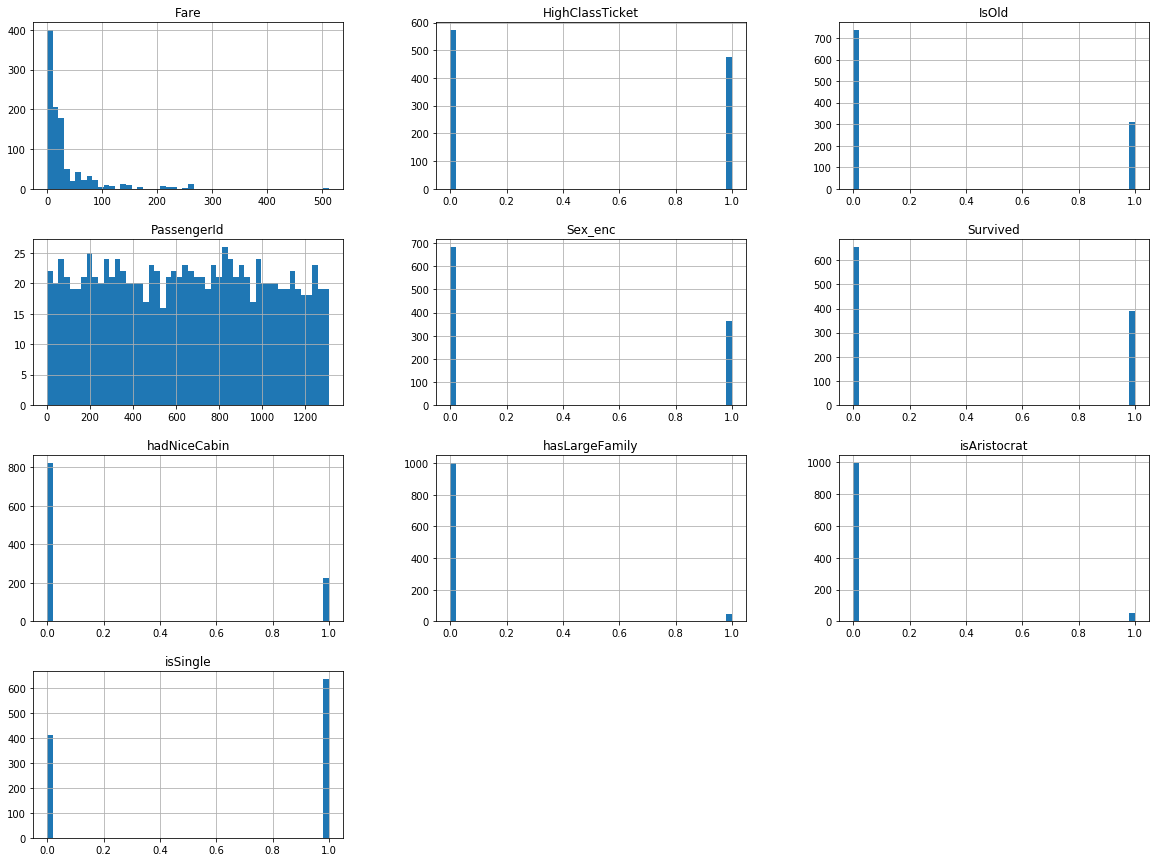

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,656.0,23.413115,34.503259,0.0,7.8542,10.5,26.0000,263.0000
1,391.0,51.104051,69.066886,0.0,11.2417,26.0,63.3583,512.3292


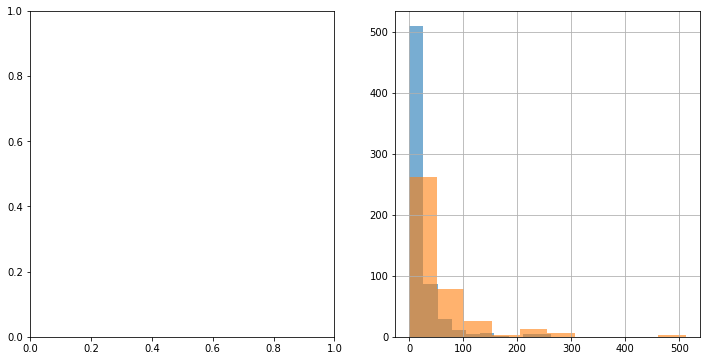

In [52]:
# TODO; Insert your analysis here. Add more cells if you need to!
train_df["Sex"].value_counts()       #just counting the number of males and females
train_df["Survived"].value_counts().plot(kind="bar")
train_df["Survived"].value_counts()
train_df["Sex"].value_counts().plot(kind="bar")
train_df["Fare"].hist(width=6)
#Encoding or binarizing Sex and displaying graphs
train_df["Sex_enc"] = train_df["Sex"].map({"female":1, "male": 0})
%matplotlib inline
train_df.hist(bins=50, figsize=(20,15))
plt.show()
fig, axes = plt.subplots(1,2,figsize=(12,6))
#plt.show()
train_df[["Survived", "Fare"]].corr()["Survived"] ## checking corealation
#train_df[["Survived", "Sex"]].corr()["Survived"] ## checking corealation
def survival_stacked_bar(variable):
    Died=train_df[train_df["Survived"]==0][variable].value_counts()/len(train_df["Survived"]==0)
    Survived=train_df[train_df["Survived"]==1][variable].value_counts()/len(train_df["Survived"]==1)
    data=pd.DataFrame([Died,Survived])
    data.index=["Did not survived","Survived"]
    data.plot(kind="bar",stacked=True,title="Percentage")
    return data.head()
#survival_stacked_bar("Fare")
train_df.groupby('Survived').Fare.hist(alpha=0.6);
train_df.groupby('Survived').Fare.describe()

**Q1:** Why did you threshhold/binarize the `Fare` featuer at that value?

**A1:** The correalation factor between Fare and Survival is 0.26. It looks like poeple who have paid more than 100 have better chance of survival. But the 80 % of the concentration of the people lie between 0 and 50. I have used a mean function to caluate the Fare estimate. So after trying out a few values I estimated it to be around 26 as I obtain high test accuracy for that fare threshold.

In [74]:
def binarize_features(df, fare_threshold):
    '''
    Binarize `Sex` and `Fare` Columns of the given dataframe. 

    For the `Fare` column, values greater than the given `fare_threshold`
    should be set to 1 and 0 otherwise. For the `Sex` column, map `male` to 0
    and `female` to 1.
    '''
    train_df = pd.read_csv('data/titanic_train.csv')
    
    df['Sex'] = train_df["Sex"].map({"female":1, "male": 0})  ## Sex is a discrete feature
   # df['Fare'] = train_df["Fare"].mask(train_df["Fare"] < fare_threshold , 0) #TODO
    
    def func(x):
        if x < fare_threshold:
            return 0
        else:
            return 1
    df['Fare'] = train_df["Fare"].apply(func)

    return df.astype(int)

train_df = binarize_features(train_df, 26)
train_df.head()

,PassengerId,Survived,HighClassTicket,IsOld,hasLargeFamily,isSingle,hadNiceCabin,isAristocrat,Fare,Sex,Sex_enc
0,128,1,0,0,0,1,0,0,0,0,0
1,1037,0,0,0,0,0,0,0,0,0,0
2,633,1,1,0,0,1,1,0,1,0,0
3,1051,1,0,0,0,0,0,0,0,1,1
4,727,1,1,0,0,0,0,0,0,1,1


Although there is a test csv, we won't always have access to labels in our test data. Instead, we hold out a portion (20%) of our training data to help us measure how generalizable the trained model is.

In [75]:
X, y = train_df.iloc[:,2:].values, train_df.iloc[:,1].values # just selecting columns
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=422)


Using `hyperparameterCurve` in `runClassifier.py`, **plot** a corresponding chart of tree depth vs accuracy and **choose** the best tree depth.

Training classifier with maxDepth=1...
Training accuracy 0.847073, test accuracy 0.852381
Training classifier with maxDepth=2...
Training accuracy 0.847073, test accuracy 0.852381
Training classifier with maxDepth=4...
Training accuracy 0.849462, test accuracy 0.857143
Training classifier with maxDepth=6...
Training accuracy 0.848268, test accuracy 0.852381
Training classifier with maxDepth=8...
Training accuracy 0.847073, test accuracy 0.852381
Training classifier with maxDepth=12...
Training accuracy 0.847073, test accuracy 0.852381
Training classifier with maxDepth=16...
Training accuracy 0.847073, test accuracy 0.852381


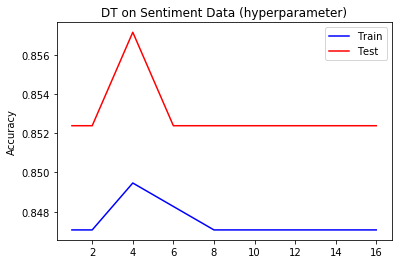

In [76]:
# TODO: Insert code and analysis here
curve = runClassifier.hyperparamCurve(dt.DT({}), 'maxDepth', [1,2,4,6,8,12,16], X_train, y_train, X_holdout, y_holdout)
runClassifier.plotCurve('DT on Sentiment Data (hyperparameter)', curve)

**Q2:** According to your analysis, what is the best tree depth? Why?

**A2:** The best tree depth is 4 or 5 because after that the training accuracy and test accuracy both deprecate. 

Now let's retrain on all the data...

In [77]:
dt = dt.DT({'maxDepth': 4 })
dt.train(X, y)

**Q3:** Why would we want to retrain a decision tree on all the data (`X` and `y`) and not just `X_train` and `y_train`?

**A3:** We would want to retrain the decision tree on all data as it might increase the test accuracy as the Algorithm learns more as long as it does not overfit the data.

We can now test our decision tree the test data!

In [78]:
test_df = pd.read_csv('data/titanic_test.csv')
#test_df.head()
test_df['Sex'] = test_df["Sex"].map({"female":1, "male": 0})
def func(x):
        if x < 26:
            return 0
        else:
            return 1
test_df['Fare'] = test_df["Fare"].apply(func)
test_df.head()
#test_df = binariz_features(test_df, 12)
#test_df.head()
X_test, y_test = test_df.iloc[:,2:].values, test_df.iloc[:,1].values
print(X_test)
print(y_test)

[[0 1 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [0 1 1 ... 0 1 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 1 0 ... 1 0 0]
 [1 0 1 ... 0 1 1]]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0
 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1
 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1
 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0
 1 1 1]


In [80]:
import dt
h = dt.DT({'maxDepth': 4 })
h.train(X_test, y_test)
h.predictAll(X_test)
y_predicted  = h.predictAll(X_test)
acc = np.mean(y_test == y_predicted)
print("Test accuracy:", acc)

Test accuracy: 0.8854961832061069
